## Explaining Linear Regression with Linear Algebra
As mentioned above, in the real world one will most likely never encounter data that lies exactly on a line. Thus, we resort to finding a best-fitting line through our data points. In order to get a better picture of how we can achieve this using Linear Algebra it could be useful to reduce the problem to its simplest form. Let's consider finding the best-fitting line through 3 non-colinear points, as described in the code below:


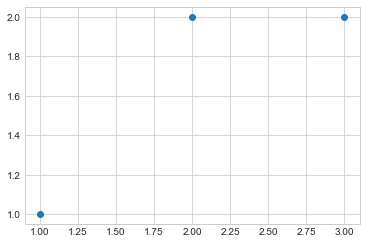

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

x = np.array([1, 2, 3])
y = np.array([1, 2, 2])

plt.scatter(x, y)
plt.show()

In the figure above we are plotting the following points: $\large\{(1,1), (2,2), (3,2)\}$. Let's imagine that we are trying to define a line $y = c + ax$ that magically goes through all three points. We would define the following relations:


$$\large\begin{cases} c + 1a = 1 \\ c + 2a = 2 \\ c + 3a = 2 \end{cases}$$

We can rewrite this system of equations as the following matrix equation:

$$\large\textbf{Ax} = \textbf{b}  \Leftrightarrow \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix} 
\begin{bmatrix} c \\ a \end{bmatrix} = 
\begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix}
$$

It is obvious from the standpoint of both Linear Algebra and Geometry that this is an unsolvable equation. Generally, equations of the form $\textbf{Ax} = \textbf{b}$ are solvable when $\textbf{b}$ is in the column space of $\textbf{A}$. Looking once again at the example above we see that it is not the case, especially when we write it down as follows:

$$
\large
c\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} + d \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix}
$$

Since this is unsolvable we would still want to see the best solution possible, that is, solve:
$$\large A \hat{x} = p$$
,where $\textbf{p}$ is a vector very close to $\textbf{b}$ as possible that is present in the column space of out matrix $\textbf{A}$ , that is, it can be written as a linear combination of columns of $\textbf{A}$. Notice that this time we replace $\textbf{x}$ by $\hat{x}$. This is in order to emphasise that, in fact, $\textbf{x}$ does not exist as a solution to the initial equation.

Let's go back now to the original equation 
$$\large Ax = b$$.
Notice that if $A$ were a square $n \times n$ invertible matrix, our job would be fairly straigh-forward:

$$
\begin{align}
\large Ax \large =&  \large b \\
\large A^{-1}Ax \large =& \large A^{-1}b \vert \cdot A^{-1} \\
\large x =& \large A^{-1}b
\end{align}
$$

However, most of the time, in real world situations, the matrix will have more rows than columns. This means that we must find some means to obtain an invertible square matrix on the left side:

$$
\begin{align}
\large A \hat{x} =& \large b \\
\large A^{T}A \hat{x} =& \large A^{T} b\\
\end{align}
$$

Voila! we know that $A^{T}A$ is invertible because it is square and we know that the initial matrix $A$ has full rank (all of its columns are linearly independent and therefore, all of its columns are pivot columns). We know from the rules of matrix multiplication that $A^{T}A$ will always produce an $n \times n$ matrix, where $n$ is the number of columns of $A$. We can now multiply both sides by $(A^{T} A)^{-1}$:
$$
\begin{align}
\large (A^{T} A)^{-1}A^{T}A \hat{x} =& \large (A^{T} A)^{-1} A^{T} b \\
\large \hat{x} =& \large (A^{T} A)^{-1} A^{T} b \\
\end{align}
$$

So we have obtained the best solution $\hat{x}$. Note that $\hat{x}$ contains the "weights" or the coeficients $c$ and $d$ of our best-fitting line. We can define a simple python function to do all the calculations for us:

In [4]:
def linearRegression(X, Y):
    weights = np.matmul(
                np.matmul(
                    np.linalg.inv(
                        np.matmul(
                            X.transpose(),
                            X)),
                    X.transpose()),
                Y)
    return weights

n = x.shape[0]
X = np.append(np.ones(n).reshape([n, 1]), x.reshape([n, 1]), axis=1)
y = y.reshape(n, 1)
wghts = linearRegression(X, y)
print(wghts)

[[0.66666667]
 [0.5       ]]


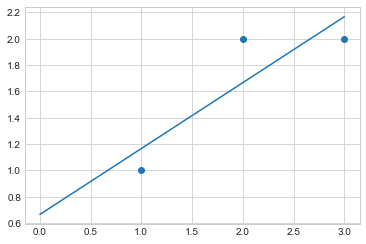

In [5]:
x1 = np.linspace(0, 3, 100)
y1 = wghts[0] + wghts[1] * x1

plt.scatter(x, y)
plt.plot(x1, y1)
#plt.axis([-5, 5, 0, 3])
plt.show()

This method is extendable to n dimensions. This means that we can have reasonably many "weights" to predict as long as we have more data points than variables to predict. The reason for this will be explained later. Let us explore the concept of Linear Regression extended to the 3-dimensional space. Now, instead of looking for a best-fitting line we are trying to produce a best-fitting plane through several points. It is harder to imagine this in higher-dimensional, but it is reasonable to state that we are dealing with some n-dimensional surface.

Let us generate some mock-up data on which we will apply our model:

In [6]:
X = np.random.uniform(0, 10, [100, 2])
row, col = X.shape
e = np.random.uniform(-5, 5, row)
Y = X[:, 0] * 2 + X[:, 1] + e

import pandas as pd
print(pd.DataFrame(np.append(X, Y.reshape([row, 1]), axis=1)))

           0         1          2
0   0.386141  3.949603   4.409130
1   3.693607  1.694688  13.250763
2   4.057889  1.889674   9.835615
3   2.776521  7.872596   9.770443
4   7.270622  8.404230  19.436246
..       ...       ...        ...
95  9.321433  3.394528  21.065530
96  3.498926  4.080273  13.583282
97  8.886730  8.919421  27.773016
98  9.002682  7.700182  29.909709
99  6.975086  3.269022  21.435097

[100 rows x 3 columns]


<code>X</code> is a $100 \times 2$ matrix with values generated randomly between $0$ and $10$ from an uniform distribution. The <code>e</code> variable will serve as the "noise" added to each data point such that it does not perfectly lie on a plane.

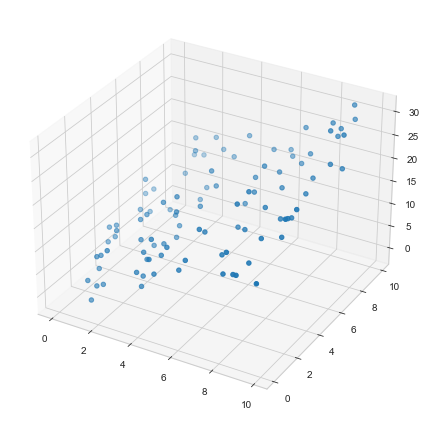

In [7]:
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)

ax = plt.axes(projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()

Next, we need to add a column of ones to our <code>X</code> matrix in order to account for the free term. Then, we apply the previously-defined model which will return the weights and then use this to plot the best-fitting plane.

In [8]:
X = np.append(np.ones(row).reshape([row, 1]), X, axis=1)
wghts = linearRegression(X, Y) 
print(wghts)

[-0.26966823  1.87724846  1.08751068]


The results are somewhat to be expected, when we look back at the function that we have defined initially: <code> Y = X[:, 0] * 2 + X[:, 1] + e </code>. The weights that we have obtained after applying the Linear Regression model are in the vicinity of the coeficients in our original function.

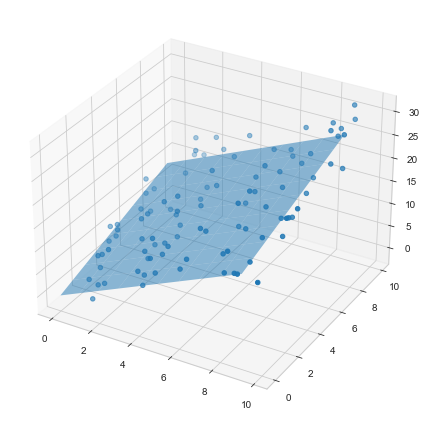

In [9]:
x, y = np.meshgrid(range(10), range(10))
z = wghts[0] + wghts[1] * x + wghts[2] * y

fig = plt.figure()
fig.set_size_inches(12.5, 7.5)

ax = plt.axes(projection="3d")
ax.scatter(X[:, 1], X[:, 2], Y)
ax.plot_surface(x, y, z, alpha=0.5)
plt.show()

# LiniarRegresion Implementation with our DataSet 

In [ ]:
# IMPORT LIBRARIES
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [57]:
# IMPORT DATASET
data_df = pd.read_excel(r'C:\Users\Stratulat\Desktop\Datasetlapachet.xlsx')
print(data_df)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


In [58]:
# DEFINE x AND y
x = data_df.drop(['PE'], axis=1).values  # drop labels from the column PE with axis=1
y = data_df['PE'].values
print(x)
print(y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [59]:
# SPLIT THE DATASET IN TRAINING SET AND TEST SET
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  # test set 30%

In [60]:
# TRAIN THE MODEL ON THE TRAINING SET
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [61]:
# PREDICT THE TEST SET RESULTS
y_pred = model.predict(x_test)
print(y_pred)
print(model.predict([[14.96, 41.76, 1024.07, 73.17]]))

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]
[467.34820092]


In [62]:
# EVALUATE THE MODEL
print(r2_score(y_test, y_pred))

0.9304112159477682


Text(0.5, 1.0, 'Actual vs. Predicted')

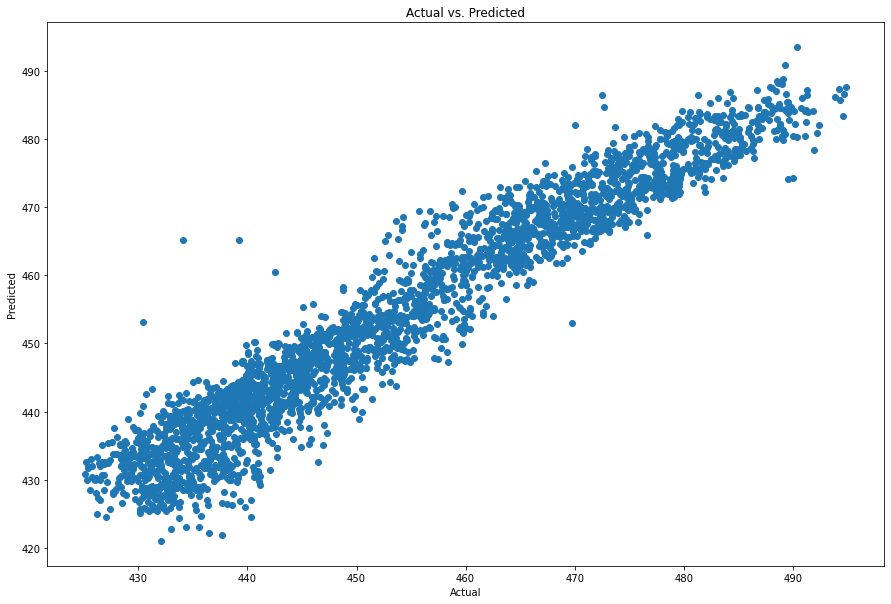

In [63]:
# PLOT THE RESULTS
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [64]:
# PREDICTED VALUES
pred_y_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
print(pred_y_df[0:25])

    Actual Value  Predicted Value  Difference
0         431.23       431.402451   -0.172451
1         460.01       458.614741    1.395259
2         461.14       462.819674   -1.679674
3         445.90       448.601237   -2.701237
4         451.29       457.879479   -6.589479
5         432.68       429.676856    3.003144
6         477.50       473.017115    4.482885
7         459.68       456.532373    3.147627
8         477.50       474.342524    3.157476
9         444.99       446.364396   -1.374396
10        444.37       441.946411    2.423589
11        437.04       441.452599   -4.412599
12        442.34       444.746375   -2.406375
13        440.74       440.874598   -0.134598
14        436.55       438.374490   -1.824490
15        460.24       454.370315    5.869685
16        448.66       444.904201    3.755799
17        432.94       437.370808   -4.430808
18        452.82       451.306760    1.513240
19        432.20       427.453009    4.746991
20        430.96       425.378258 

In [65]:
# Concatenate
climate_change_df = pd.concat([data_df.AT, data_df.AP, data_df.RH ], axis=1)
print(climate_change_df)

         AT       AP     RH
0     14.96  1024.07  73.17
1     25.18  1020.04  59.08
2      5.11  1012.16  92.14
3     20.86  1010.24  76.64
4     10.82  1009.23  96.62
...     ...      ...    ...
9563  16.65  1014.01  91.00
9564  13.19  1023.67  66.78
9565  31.32  1012.92  36.48
9566  24.48  1013.86  62.39
9567  21.60  1017.23  67.87

[9568 rows x 3 columns]


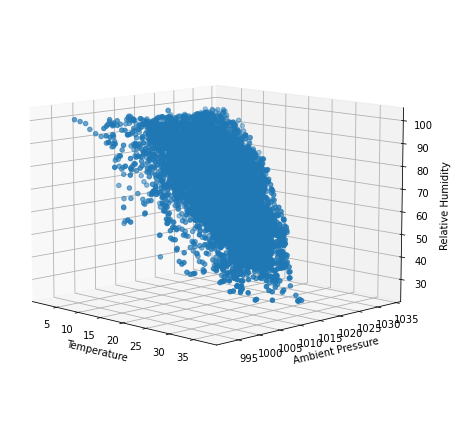

In [66]:
# ATxAPxRH 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=climate_change_df['AT'], ys=climate_change_df['AP'], zs=climate_change_df['RH'])

ax.set_ylabel('Ambient Pressure'); ax.set_xlabel('Temperature'); ax.set_zlabel('Relative Humidity')
ax.view_init(10, -45)

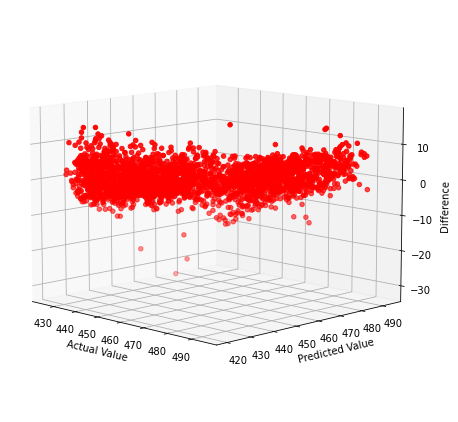

In [67]:
# Results of Regret 
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pred_y_df['Actual Value'], ys=pred_y_df['Predicted Value'], zs=pred_y_df['Difference'], color='red')
ax.set_ylabel('Predicted Value'); ax.set_xlabel('Actual Value'); ax.set_zlabel('Difference')
ax.view_init(10, -45)
